In [109]:
import numpy as np
import time, os, sys, random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from scipy import stats

In [110]:
df = pd.read_excel(r"C:\Users\alexi\EPFL\MA3\Machine_learning\20151218_E14_BM_mTF8additionals_4\features_cells_A1.xlsx")


In [111]:
df = df[df['patch_size']>50]
df = df[df['patch_size']<4000]


In [112]:
df.reset_index(inplace = True)
df.drop('sum_intensity', inplace = True,axis = 1)
df['mean_intensity2'] = df.mean_intensity**2
df['median_intensity2'] = df.median_intensity**2
df['mean_intensity3'] = df.mean_intensity**3
df['median_intensity3'] = df.median_intensity**3
df.head()


,index,Unnamed: 0,patch_size,mean_intensity,median_intensity,img,mean_intensity2,median_intensity2,mean_intensity3,median_intensity3
0,2,patch_1,1209,973.141439,974.0,0,9.470043e+05,948676.0,9.215691e+08,9.240104e+08
1,3,patch_2,1181,959.066046,959.0,0,9.198077e+05,919681.0,8.821563e+08,8.819741e+08
2,4,patch_3,2544,919.231132,918.0,0,8.449859e+05,842724.0,7.767373e+08,7.736206e+08
3,5,patch_4,1598,1036.212140,1037.0,0,1.073736e+06,1075369.0,1.112618e+09,1.115158e+09
4,6,patch_5,473,861.281184,860.0,0,7.418053e+05,739600.0,6.389029e+08,6.360560e+08


In [113]:
for i in range(12):
    X = df.to_numpy()[:,[3,4,6,7,8,9]][df['img']==i]
    Y = df.to_numpy()[:,2][df['img']==i]

    reg = LinearRegression().fit(X, Y)
    print(reg.score(X, Y))
    print(reg.coef_)
    print(reg.intercept_)

for i in range(12):    
    X = df[df.columns[[3,6]]][df['img']==i]
    Y = df['patch_size'][df['img']==i]
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    print("value/p value for the mean coef and image          ",i," ",round(est2.params[1],5),"//",round(est2.pvalues[1],5))
    print("value/p value for the mean squarred coef and image ",i," ",round(est2.params[2],5),"//",round(est2.pvalues[2],5))
    

0.0381784851078919
[ 7.42652089e+01 -6.38199766e+01 -4.62918040e-02  3.86849332e-02
  9.77960722e-06 -8.03094248e-06]
-3663.58336621083
0.004687074712997119
[-4.44401668e+01  4.04174144e+01  3.45806271e-02 -3.13870895e-02
 -9.06577760e-06  8.19882994e-06]
2779.183388721535
0.011525037131280613
[ 5.91605026e+01 -5.64954080e+01 -3.84668557e-02  3.60514136e-02
  7.55293355e-06 -6.93428200e-06]
185.53488058627818
0.02105655519645233
[-1.58726911e+01  1.75188361e+01  1.40872140e-02 -1.59616518e-02
 -4.53110109e-06  5.01278611e-06]
829.5528395276408
0.014787098419462907
[ 1.56711240e+01 -1.52107799e+01 -9.02131677e-03  8.80866465e-03
  1.51999497e-06 -1.48171352e-06]
699.668796163628
0.013136277557103448
[ 1.00362425e+01 -7.26230223e+00 -6.37115177e-03  4.81075759e-03
  9.85851940e-07 -7.43820453e-07]
-468.29604841866035
0.02450543588495324
[ 4.10220185e+01 -3.40587104e+01 -2.92025808e-02  2.44070940e-02
  5.63730499e-06 -4.64352684e-06]
-2210.826886103434
0.017796442392180034
[ 2.81803027e+

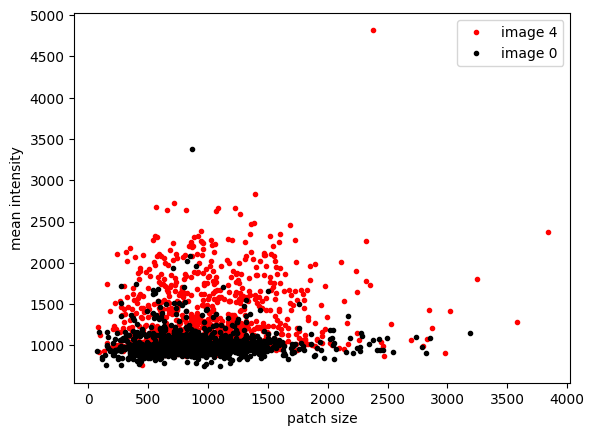

In [140]:
plt.figure()
im = 4
plt.plot(df['patch_size'][df['img']==im],df['mean_intensity'][df['img']==im],marker = '.',lw = 0,color = 'red',label = "image "+str(im))
im = 0
plt.plot(df['patch_size'][df['img']==im],df['mean_intensity'][df['img']==im],marker = '.',lw = 0,color = 'black',label = "image "+str(im))
plt.xlabel("patch size")
plt.ylabel("mean intensity")
plt.legend()
plt.show()

